<img align="center" src="https://iili.io/3wI8gI.png" style="height:90px" style="width:30px"/>

# Building a RandomForest to predict House Prices in Stockholm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hemnet_geolocation.csv")

In [2]:
df

,address,price,list_fee,sold_date,sqm,rooms,elevator,patio,new_production,balcony,gardet,kungsholmen,norrmalm,ostermalm,sodermalm,vasastan,latitude,longitude
0,Settergatan 14,7500000,4312.0,2023-04-12,71.0,3.0,1,0,0,1,1,0,0,0,0,0,59.359598,18.095192
1,Heimdalsgatan 5,14200000,4755.0,2023-04-12,103.0,5.0,1,0,0,1,0,0,0,0,0,1,59.344440,18.047711
2,Bellmansgatan 21,10400000,3760.0,2023-04-12,83.0,3.0,0,0,0,1,0,0,0,0,1,0,59.317409,18.066333
3,Gumshornsgatan 7,3900000,1975.0,2023-04-12,28.5,1.0,1,0,0,1,0,0,0,1,0,0,59.336256,18.089190
4,Bondegatan 46,2750000,1206.0,2023-04-12,21.0,1.0,1,0,0,1,0,0,0,0,1,0,59.313272,18.083210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,Kellgrensgatan 10,6450000,4981.0,2022-10-01,88.0,4.0,1,0,0,1,0,1,0,0,0,0,59.336435,18.014871
2406,Roslagsgatan 23 B,6042000,2299.0,2022-10-01,60.0,2.0,0,0,0,1,0,0,0,0,0,1,59.347264,18.058401
2407,Sankt Eriksgatan 52A,7050000,3197.0,2022-10-01,73.0,2.5,1,0,0,1,0,1,0,0,0,0,59.335717,18.034554
2408,Gästrikegatan 14A,7700000,2926.0,2022-10-01,61.0,3.0,0,0,0,0,0,0,0,0,0,1,59.341689,18.040275


<Axes: ylabel='price'>

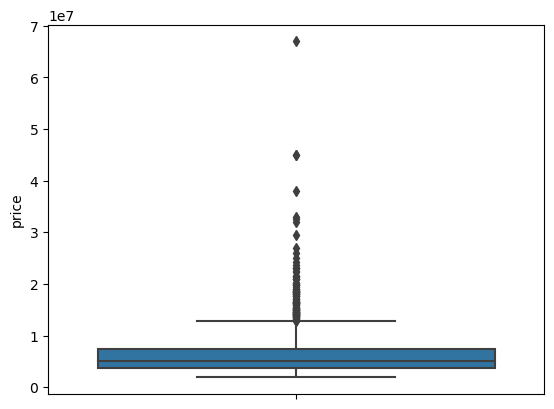

In [3]:
sns.boxplot(data=df, y="price")

In [4]:
df.price.min()

1900000

In [5]:
df.price.max()

67000000

In [8]:
df.price.quantile(.951)

12750000.0

In [11]:
# winzoring the outliers d
df.loc[df.price > df.price.quantile(.951), "price"] = df.price.quantile(.951)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         2410 non-null   object 
 1   price           2410 non-null   int64  
 2   list_fee        2410 non-null   float64
 3   sold_date       2410 non-null   object 
 4   sqm             2410 non-null   float64
 5   rooms           2410 non-null   float64
 6   elevator        2410 non-null   int64  
 7   patio           2410 non-null   int64  
 8   new_production  2410 non-null   int64  
 9   balcony         2410 non-null   int64  
 10  gardet          2410 non-null   int64  
 11  kungsholmen     2410 non-null   int64  
 12  norrmalm        2410 non-null   int64  
 13  ostermalm       2410 non-null   int64  
 14  sodermalm       2410 non-null   int64  
 15  vasastan        2410 non-null   int64  
 16  latitude        2410 non-null   float64
 17  longitude       2410 non-null   f

# EDA

In [13]:
df.columns

Index(['address', 'price', 'list_fee', 'sold_date', 'sqm', 'rooms', 'elevator',
       'patio', 'new_production', 'balcony', 'gardet', 'kungsholmen',
       'norrmalm', 'ostermalm', 'sodermalm', 'vasastan', 'latitude',
       'longitude'],
      dtype='object')

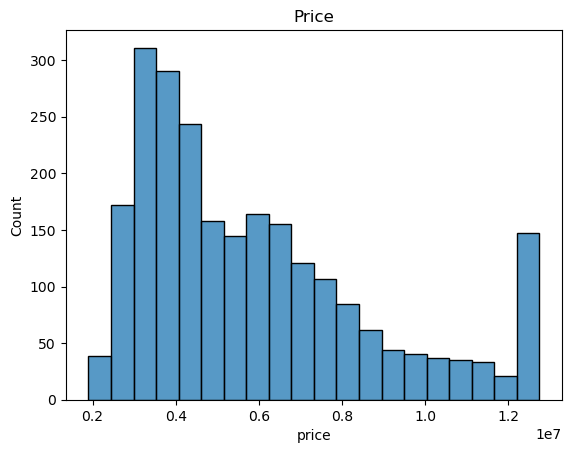

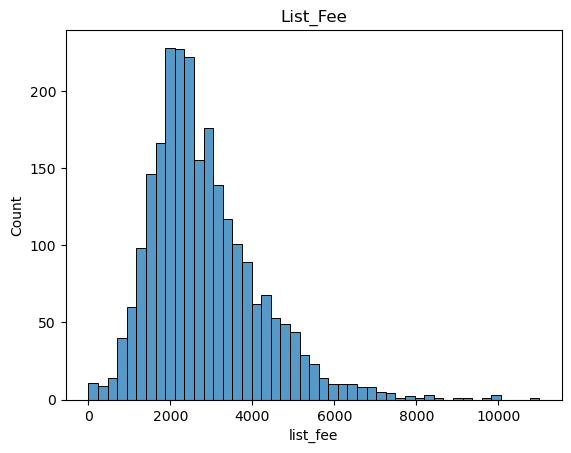

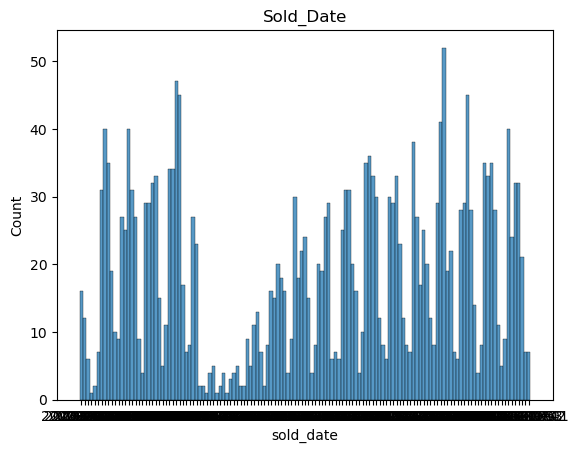

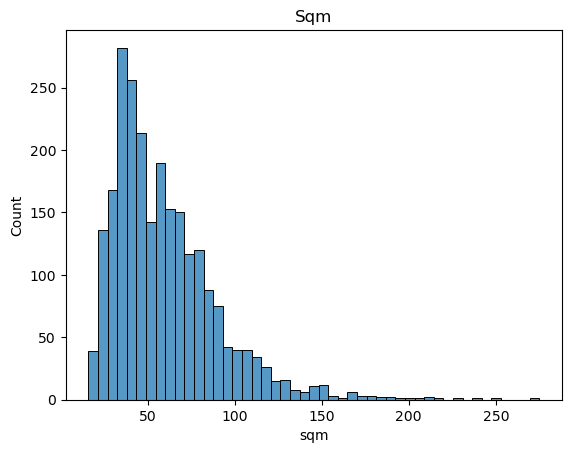

In [15]:
for col in ['price', 'list_fee', 'sold_date', 'sqm']:
    sns.histplot(data=df, x=col)
    plt.title(col.title())
    plt.show()

In [20]:
df["price_sqm"] = df.price/df.sqm

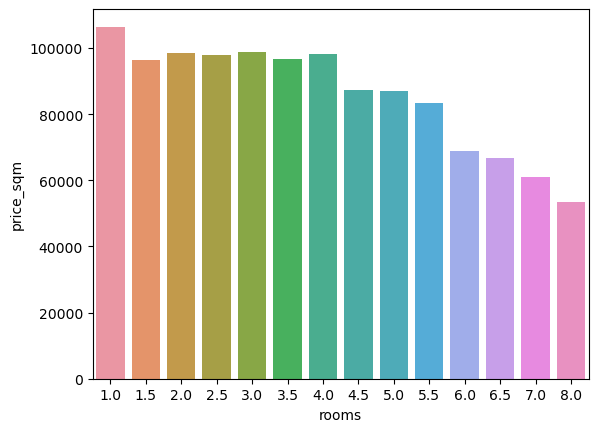

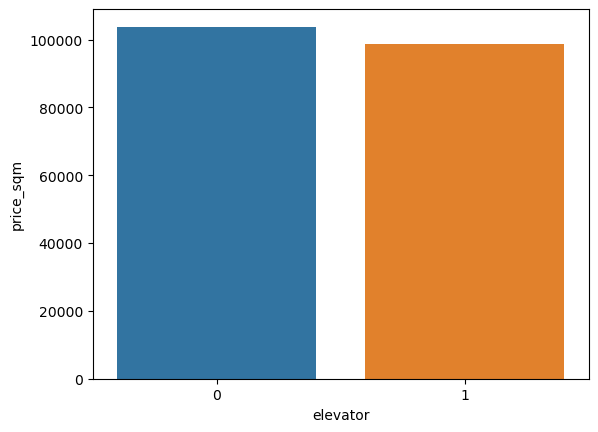

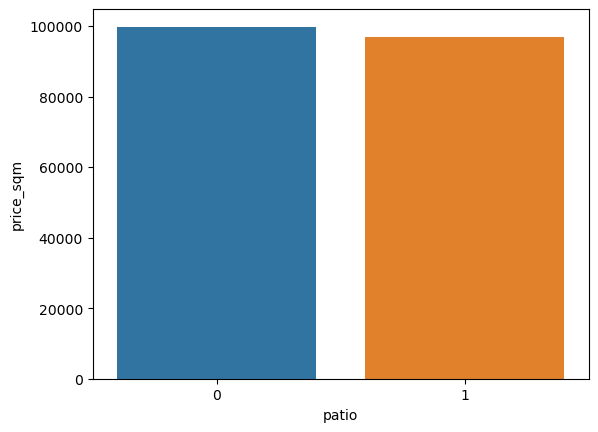

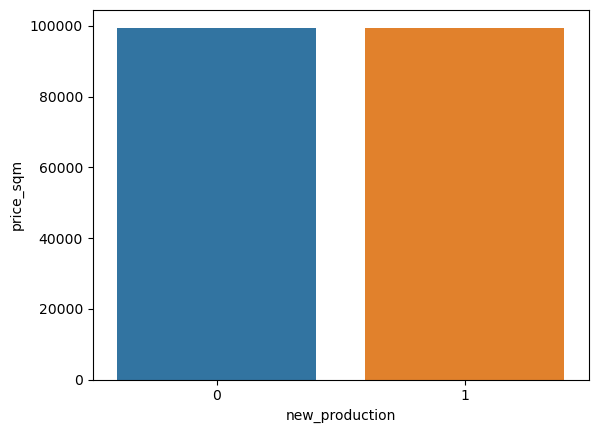

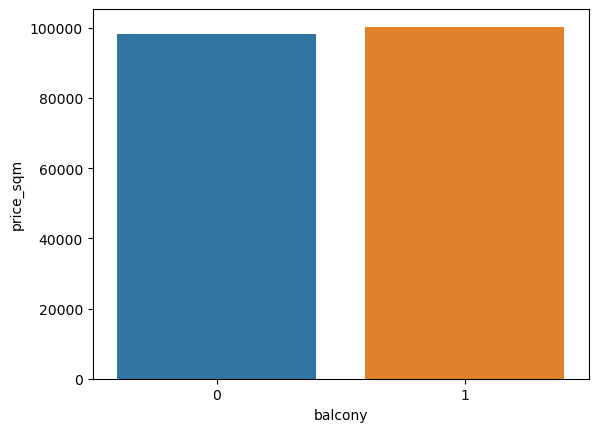

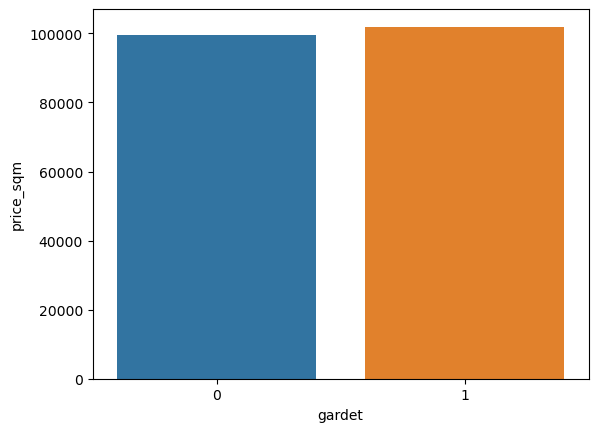

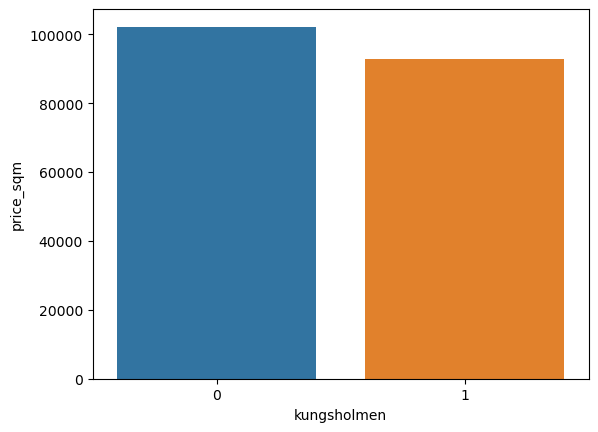

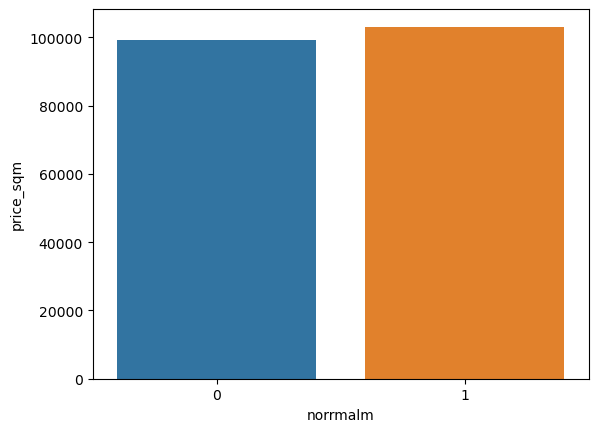

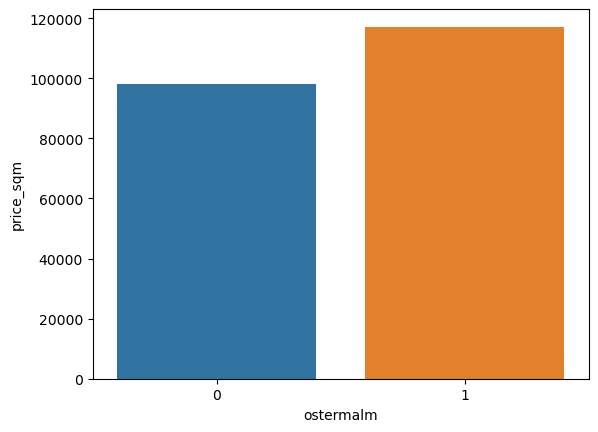

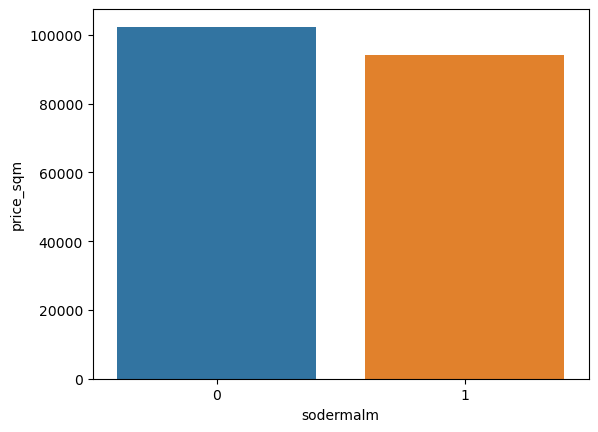

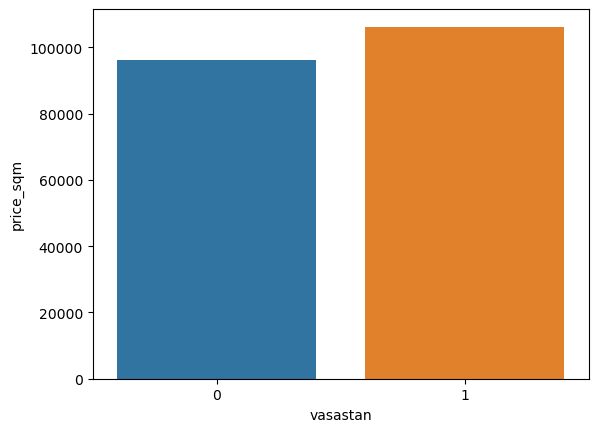

In [21]:
for col in ['rooms', 'elevator','patio', 'new_production', 'balcony', 'gardet', 'kungsholmen','norrmalm', 'ostermalm', 'sodermalm', 'vasastan']:
    sns.barplot(x=col, y="price_sqm", data=df, estimator="median", errorbar=None)
    plt.ticklabel_format(style="plain", axis="y")
    plt.show()
    
    
    
    

<Axes: >

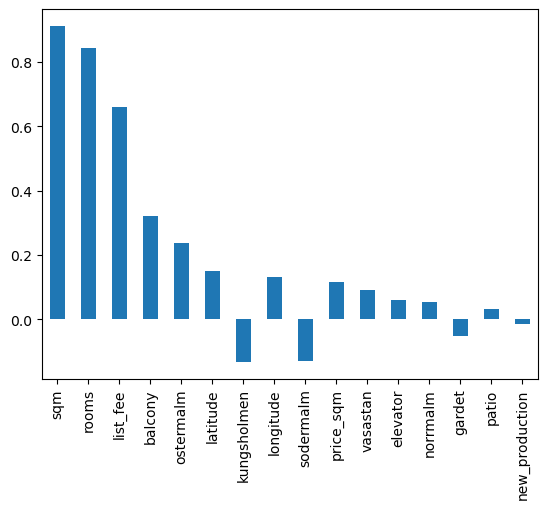

In [25]:
df.corr(numeric_only=True)["price"].drop(index="price").sort_values(ascending=False, key=abs).plot.bar()

In [29]:
df.corr(numeric_only=True)["price"].drop(index="price").sort_values(ascending=False, key=abs).to_frame()

,price
sqm,0.911738
rooms,0.845097
list_fee,0.660494
balcony,0.321136
ostermalm,0.236419
latitude,0.149641
kungsholmen,-0.132466
longitude,0.132404
sodermalm,-0.128575
price_sqm,0.115881


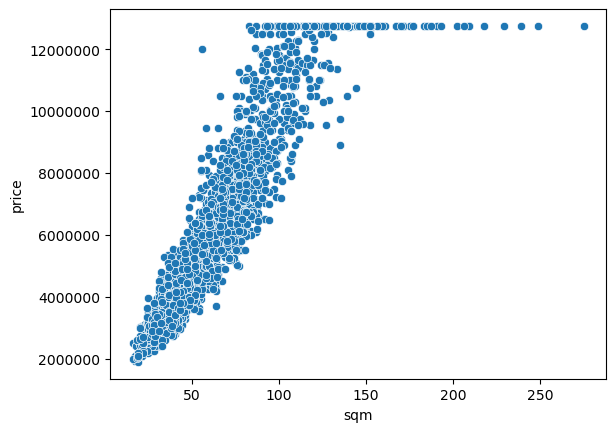

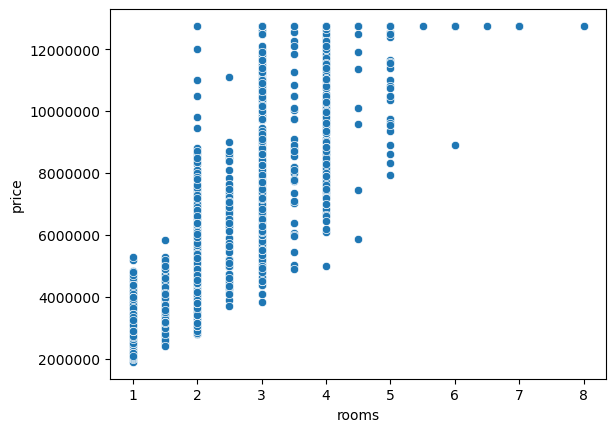

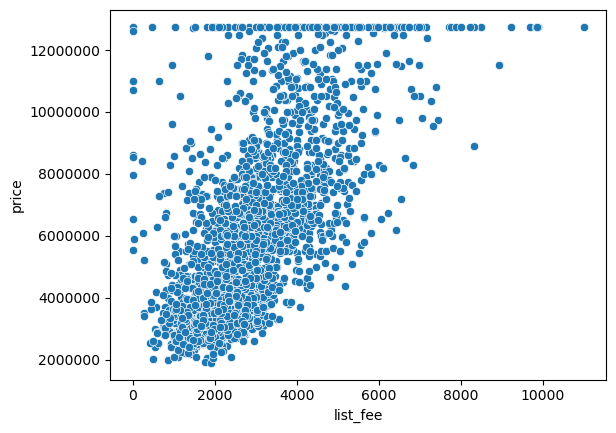

In [31]:
for col in ["sqm", "rooms", "list_fee"]:
    sns.scatterplot(x=col, y="price", data=df)
    plt.ticklabel_format(style="plain", axis="y")
    plt.show()

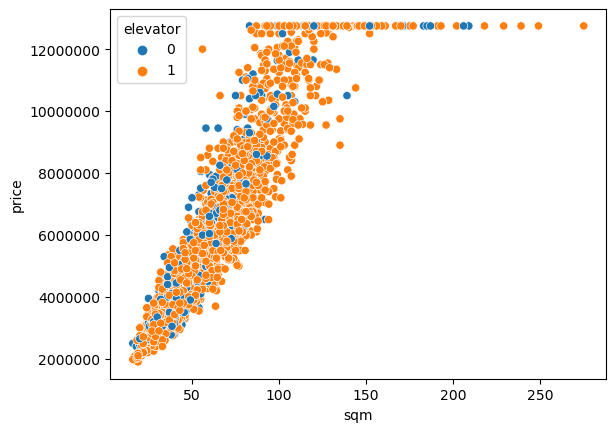

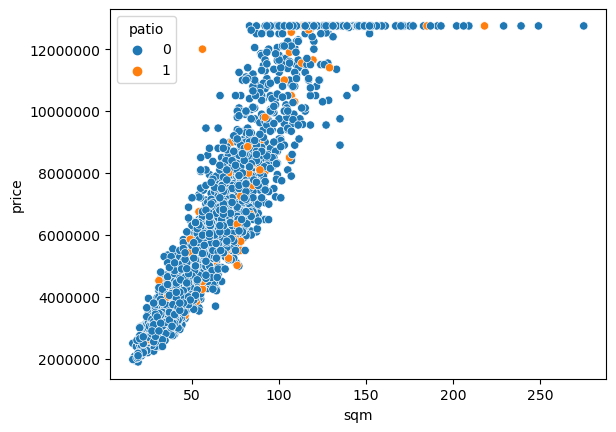

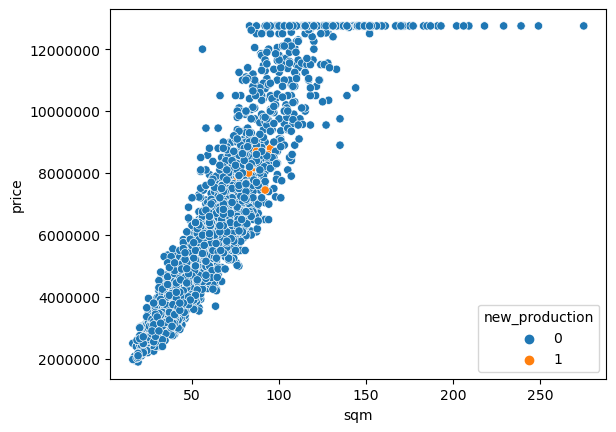

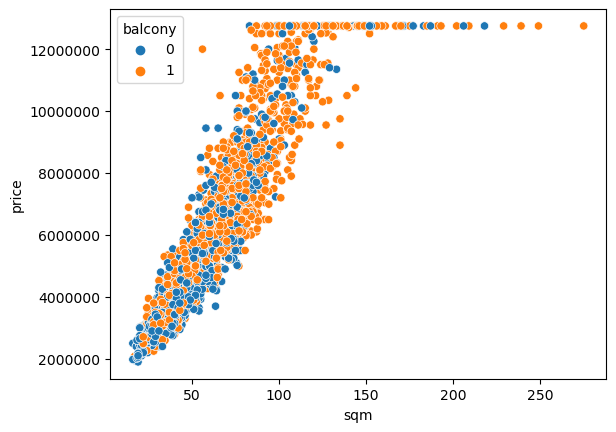

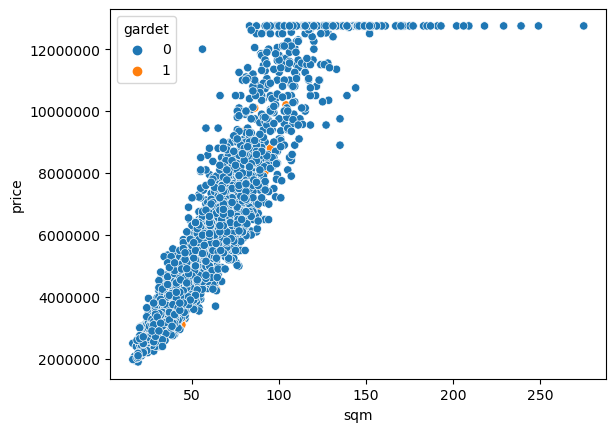

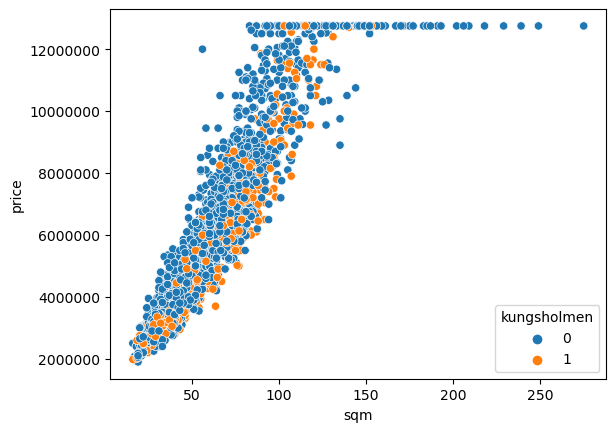

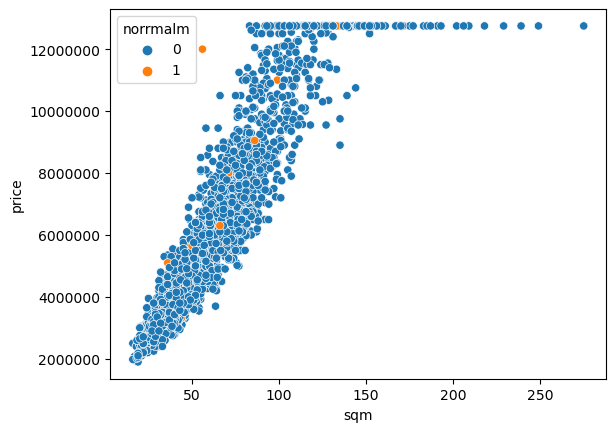

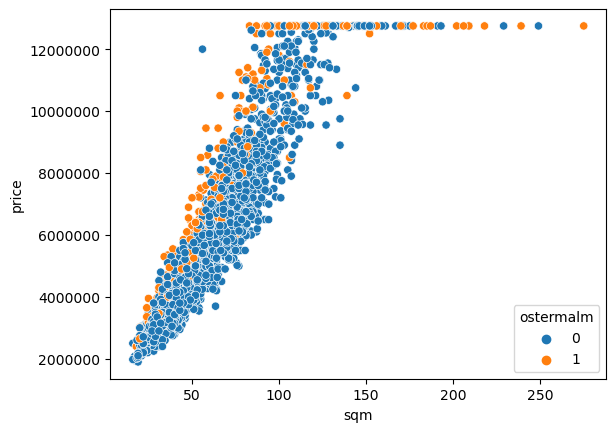

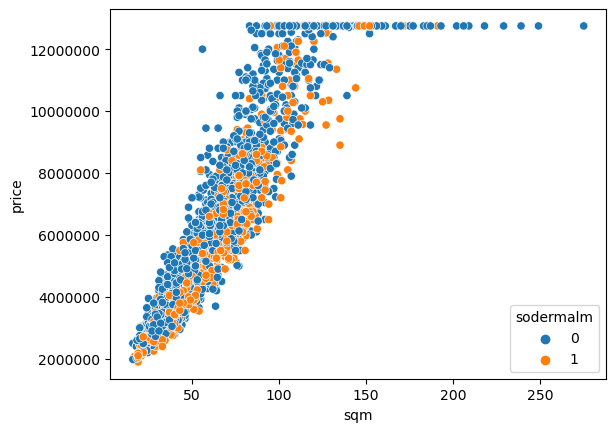

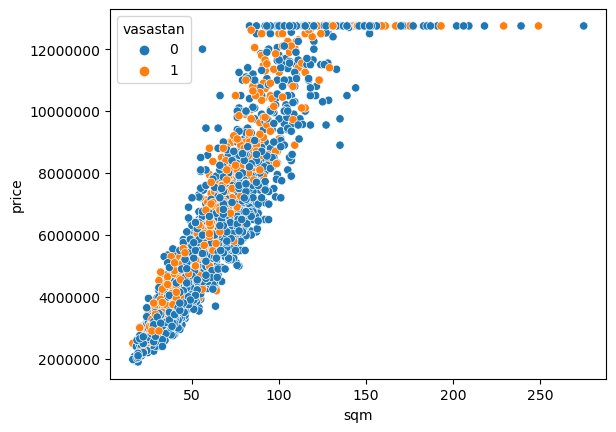

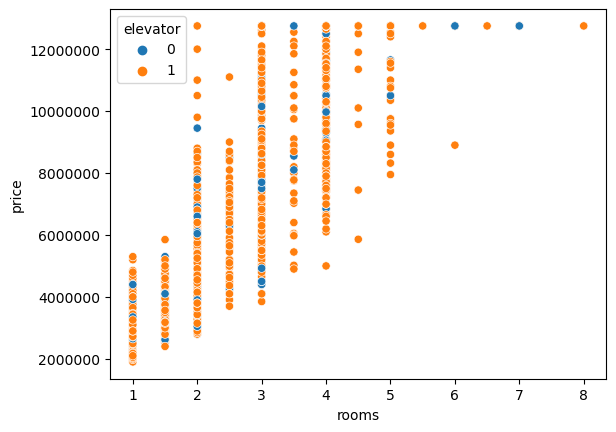

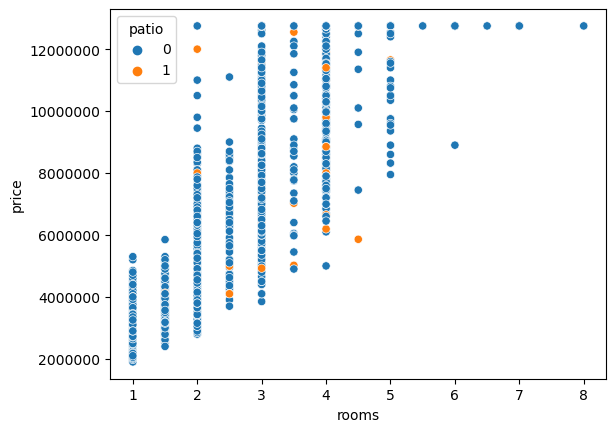

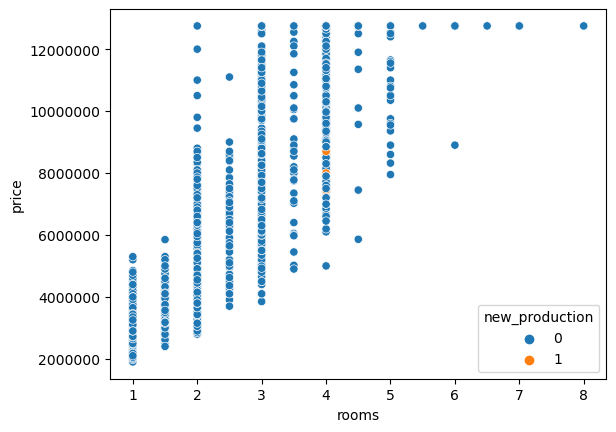

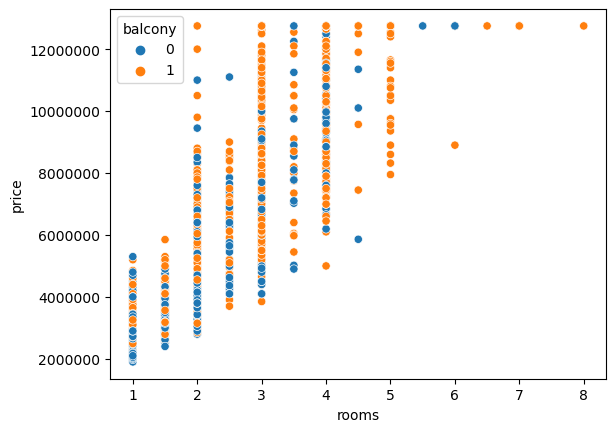

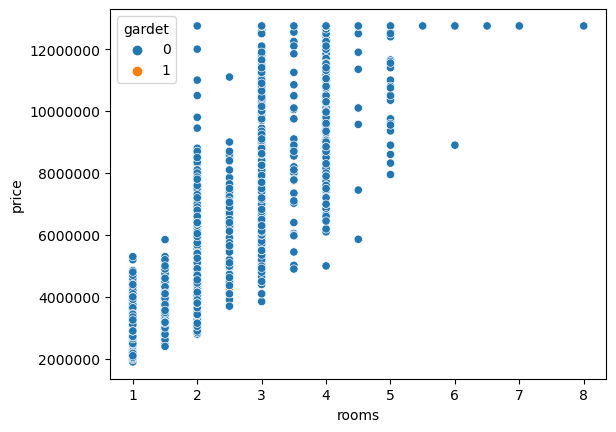

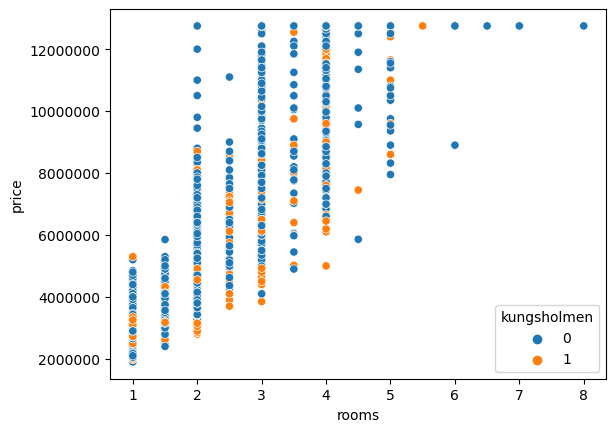

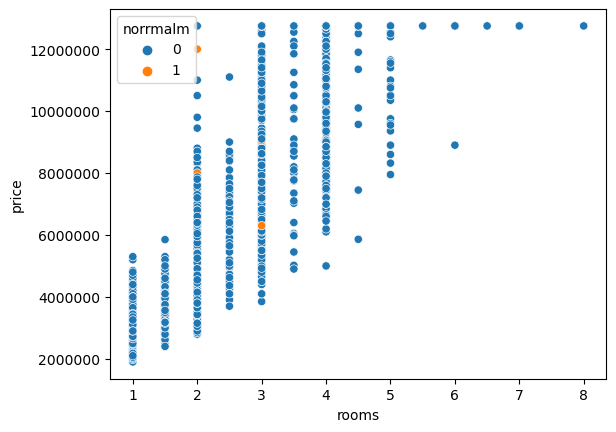

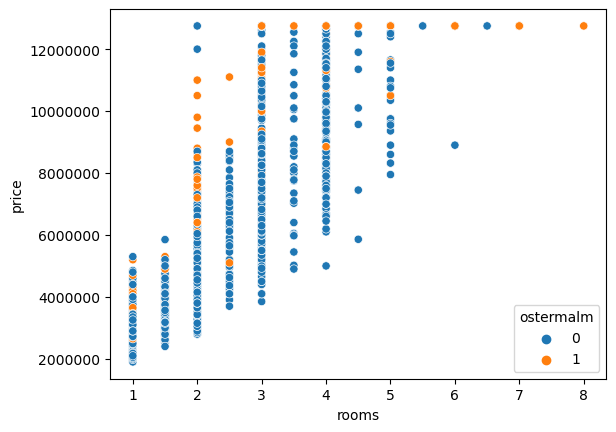

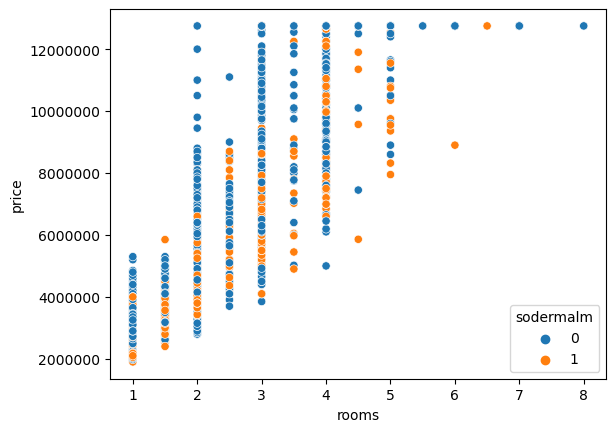

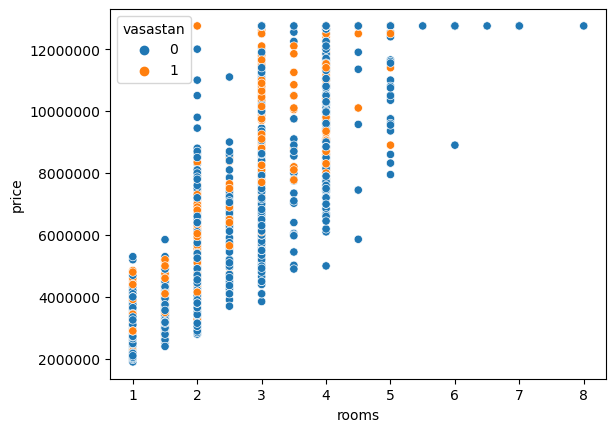

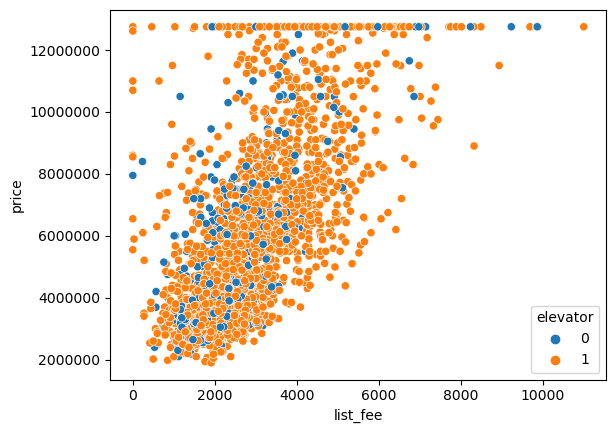

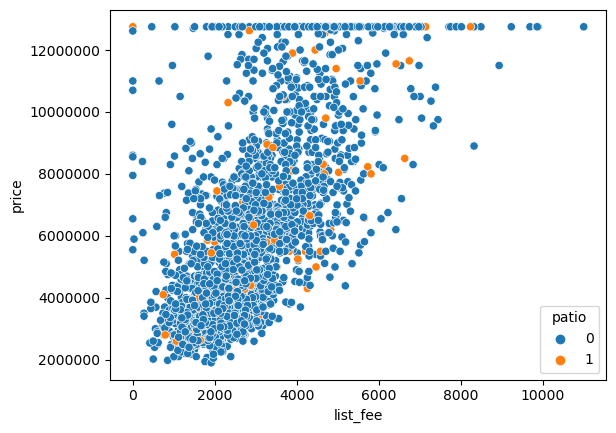

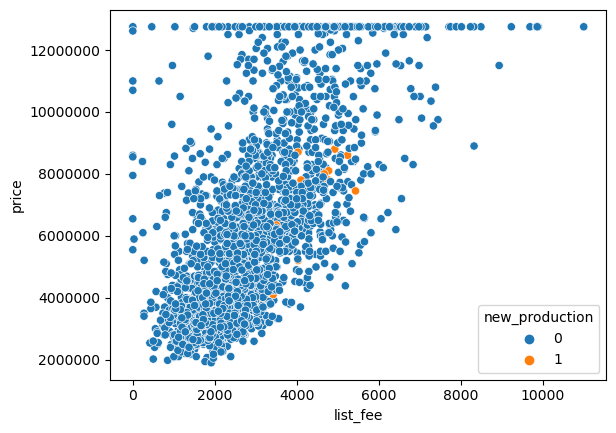

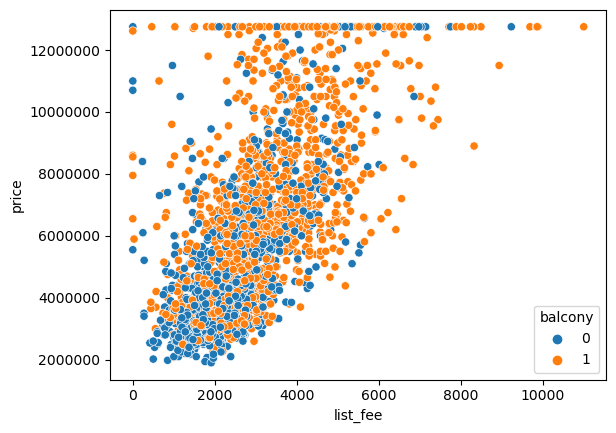

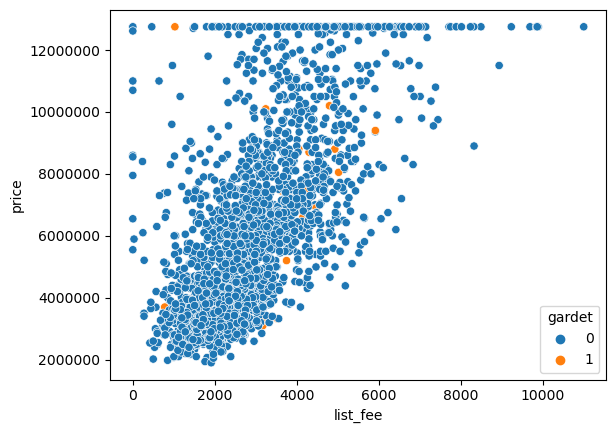

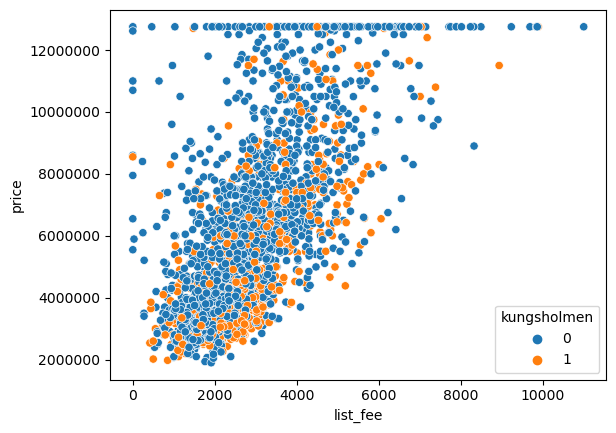

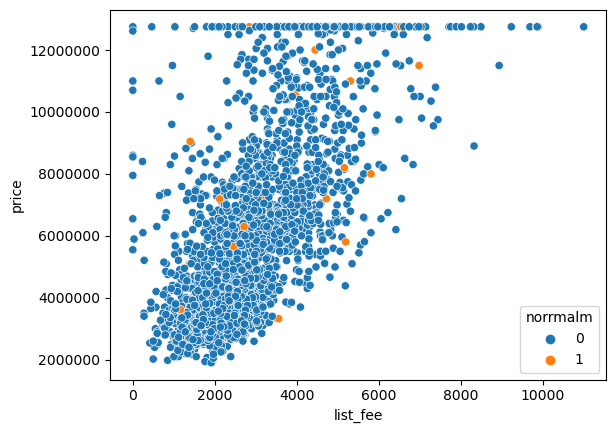

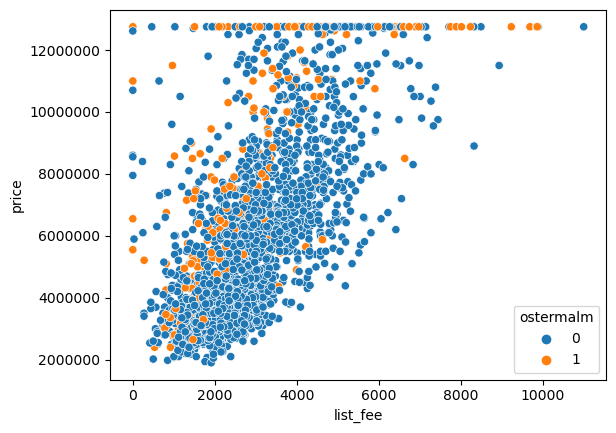

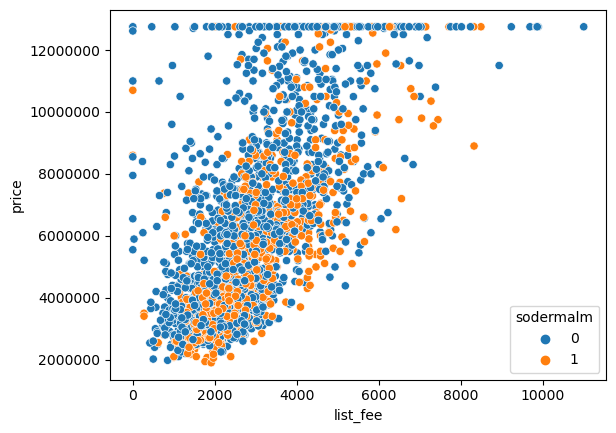

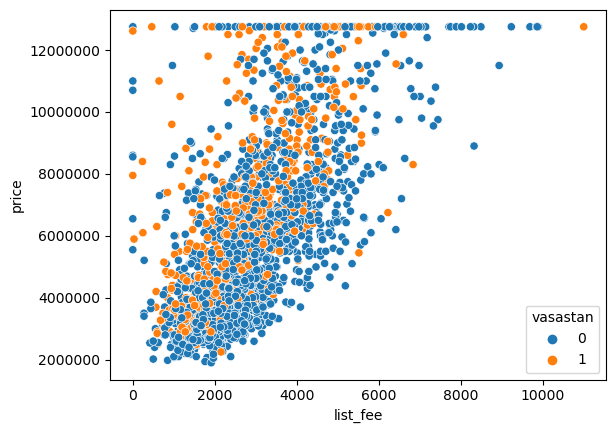

In [33]:
for col in ["sqm", "rooms", "list_fee"]:
    for binary_col in ['elevator','patio', 'new_production', 'balcony', 'gardet', 'kungsholmen','norrmalm', 'ostermalm', 'sodermalm', 'vasastan']:
        sns.scatterplot(x=col, y="price", data=df, hue=binary_col)
        plt.ticklabel_format(style="plain", axis="y")
        plt.show()

# Feature Selection & Engineering

In [34]:
df.head()

,address,price,list_fee,sold_date,sqm,rooms,elevator,patio,new_production,balcony,gardet,kungsholmen,norrmalm,ostermalm,sodermalm,vasastan,latitude,longitude,price_sqm
0,Settergatan 14,7500000,4312.0,2023-04-12,71.0,3.0,1,0,0,1,1,0,0,0,0,0,59.359598,18.095192,105633.802817
1,Heimdalsgatan 5,12750000,4755.0,2023-04-12,103.0,5.0,1,0,0,1,0,0,0,0,0,1,59.344440,18.047711,123786.407767
2,Bellmansgatan 21,10400000,3760.0,2023-04-12,83.0,3.0,0,0,0,1,0,0,0,0,1,0,59.317409,18.066333,125301.204819
3,Gumshornsgatan 7,3900000,1975.0,2023-04-12,28.5,1.0,1,0,0,1,0,0,0,1,0,0,59.336256,18.089190,136842.105263
4,Bondegatan 46,2750000,1206.0,2023-04-12,21.0,1.0,1,0,0,1,0,0,0,0,1,0,59.313272,18.083210,130952.380952


In [35]:
df.drop("address", axis=1, inplace=True)

In [36]:
df.drop("price_sqm", axis=1, inplace=True)

In [38]:
from datetime import datetime

df["sold_date"] = df["sold_date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

In [39]:
df["sold_date"].min()

738429

In [40]:
df["sold_date"].max()

738622

In [46]:
df['sold_date'] = df['sold_date'] - (df["sold_date"].min())

In [47]:
df.drop(columns=["gardet", "norrmalm", "patio", "new_production"], inplace=True)

# Machine Learning

In [48]:
# X, y
X = df.drop("price", axis=1)
y = df["price"]

## train test split

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X.columns

Index(['list_fee', 'sold_date', 'sqm', 'rooms', 'elevator', 'balcony',
       'kungsholmen', 'ostermalm', 'sodermalm', 'vasastan', 'latitude',
       'longitude'],
      dtype='object')

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

num_features = ['list_fee', 'sold_date', 'sqm', 'rooms', 'latitude','longitude']

scaler = RobustScaler()
num_transformer = make_pipeline(scaler)
preprocessor = make_column_transformer((num_transformer, num_features))

rf = RandomForestRegressor()
pipe = make_pipeline(preprocessor, rf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['list_fee', 'sold_date',
                                                   'sqm', 'rooms', 'latitude',
                                                   'longitude'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [54]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")

print(f"Cross fold = {cv_score}\nCross fold avg = {cv_score.mean()}")

Cross fold = [0.91537725 0.93304073 0.92460691 0.91505714 0.92939531]
Cross fold avg = 0.923495468004923


In [55]:
y_pred = pipe.predict(X_train)

In [56]:
y_pred

array([6273150., 7766100., 5844700., ..., 2864250., 4353850., 3866650.])

In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mae_pct = mean_absolute_percentage_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("TRAINING DATA\n")
print("MSE: ", mse)
print("MAE: ", mae)
print("MAE pct: ", mae_pct)
print("R-squared: ", r2)

TRAINING DATA

MSE:  82398945706.77477
MAE:  193904.14678423238
MAE pct:  0.03264850225936644
R-squared:  0.9897917374674213


In [60]:
y_pred = pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mae_pct = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("TRAINING DATA\n")
print("MSE: ", mse)
print("MAE: ", mae)
print("MAE pct: ", mae_pct)
print("R-squared: ", r2)

TRAINING DATA

MSE:  538822735935.2697
MAE:  515033.58921161824
MAE pct:  0.08703381548048697
R-squared:  0.9283144358605295


In [64]:
X_test.columns

Index(['list_fee', 'sold_date', 'sqm', 'rooms', 'elevator', 'balcony',
       'kungsholmen', 'ostermalm', 'sodermalm', 'vasastan', 'latitude',
       'longitude'],
      dtype='object')

In [82]:
my_apartment = np.array([3610, 190, 56, 2, 1, 1, 0, 0, 1, 0, 59.316711946447654, 18.08080485343805]).reshape(1,-1)

In [83]:
data = pd.DataFrame(my_apartment, columns = X.columns)

In [84]:
pipe.predict(data)

array([6382800.])

In [85]:
data

,list_fee,sold_date,sqm,rooms,elevator,balcony,kungsholmen,ostermalm,sodermalm,vasastan,latitude,longitude
0,3610.0,190.0,56.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,59.316712,18.080805


In [86]:
my_apartment

array([[3.61000000e+03, 1.90000000e+02, 5.60000000e+01, 2.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 5.93167119e+01, 1.80808049e+01]])

In [87]:
y_test

2009    11650000
2082     7900000
1684    12750000
2301     4000000
792      4170000
          ...   
1658    12625000
528      3650000
1728     3620000
2225     3280000
564      7100000
Name: price, Length: 482, dtype: int64

In [88]:
y_pred

array([10842700., 10215850., 12750000.,  4085050.,  4166300.,  7239200.,
        4652550.,  4271400.,  3731700.,  5747600.,  3028550.,  5483250.,
        5013800.,  6815900.,  4811400.,  6781890.,  3496250.,  2764900.,
        3052260.,  5613050.,  2778850.,  5929670.,  7861900., 12750000.,
        3426050.,  5676250., 11365450.,  7609525.,  6093420.,  6329400.,
        2943600.,  2675570., 12484000.,  7052050.,  7519425., 12064750.,
        4271250.,  3091850.,  3633450.,  4738200.,  5881750.,  9453550.,
        7773400.,  5925660.,  4442850.,  4012800.,  6596200., 12503500.,
        4038850., 10889750.,  4612350.,  4226600.,  4715400.,  6495550.,
        3873350.,  2881420., 10971250.,  7730125.,  3250350.,  3778000.,
        6203500.,  4862650., 12410500.,  8334450., 10411250.,  7485200.,
        4204950.,  7083700.,  3502850., 11558150.,  6009000.,  3067010.,
        7856250.,  9403050.,  2864400.,  5856320.,  6999100.,  6812350.,
        7725000.,  4190000.,  2858750.,  7282400., 